**Introduction to Bioinformatics**<br>
A masters course by Blaž Zupan and Tomaž Curk<br>
Ljubljana 2016

Disclaimer: this work is a first draft of our working notes. The images were obtained from various web sites, but mainly from the wikipedia entries with explanations of different biological entities. Material is intended for our 2016 class and is not meant for distribution.

As a first draft, this material may (does) contain errors. If you spot any, please report them to blaz.zupan@fri.uni-lj.si.

## Lecture Notes Part 2
# The First Look at the Genome

## Central Dogma of Molecular Biology

The central dogma of molecular biology defines the flow of genetic information within biological systems. In simple terms: the central dogma says that "DNA makes RNA makes protein". A bit longer: DNA encodes the information about the sequence of amino acids in proteins. To make the protein, the information (protein coding sequence) from DNA is first transcribed to RNA and then translated to protein. Central dogma also claims that this is the direction how the information flows. That is, the information on sequence of amino acids in proteins never gets translated back to the DNA.

## Constitution of the DNA

DNA is a long molecule composed of nucleotides, a sugar called deoxyribose and a phosphate group. There are four different nucleotides: cytosine (C), guanine (G), adenine (A), and thymine (T). DNA consists of two strands coiled around each other to form a double helix. The two strands are joined to each other by weak hydrogen bounds, where adenine can bound to thymine and cytosine to guanine.

Each strand is composed of alternating sugar and phosphate group, forming a sugar-phosphate backbone using a strong covalent bond. Nucleotides are attached to the backbone, one nucleotide per one sugar group. 

![](figs/01-dna-in-close.png "Components and bonds in the DNA.")

Because of complementarity of the two strains, one can use one strain to infer the composition of another strain. Both strands carry the same information.

The difference in strength of the bonds turns DNA into a sort of a zipper. It does not take much energy to unzip the DNA, that is, open the double helix, while the backbone holding the strain together and protecting the sequence against any damages.

## Directionality

Turns out that two strains of the DNA run in a different direction. To start thinking about direction, we have to examine a sugar group from a sugar-phosphate backbone. To make life easier, and to put some order in the chemical formulas, chemists have decided to number the carbon atoms in the sugar and label them with "prime" notation, that is, using a number and a prime sign, like 1' (one-prime) and 3' (three prime). Here is a depiction of the atom numbering for a sugar group:

![](figs/02-sugar.png "Sugar group and atom numbering.")

Sugar is attached to the backbone with a 5'-end (five prime end), where we find a posphate group, and with a 3'-end on the other side. Based on this numenclature, the DNA has a 5' and a 3' end, according to the carbon atom of the sugar that ends the chain. Notice that if one strand runs from 5' to 3', the other, complementary one, runs in the opposite direction, from 3' to 5'.

## Genome Size

The complete DNA sequence defines what we call a genome. The genome is therefore the total genetic information that is carried within the cell. That includes the DNA in the nucleus and DNA in any of the organelles. Huh, this is new: turns out that some of the organells also include DNA. In animals, such organelle is mitochondria and in plants, this are the chloroplasts. Despite this, when we will refer to a genome for eukaryotes, we will usually mean the DNA in the nucleus, and we will refer to the genetic material in the mitochondria as mitochondrial genome. DNA in the nucleus is most often not a single molecule, but rather broken into pieces and organized within the chromosomes. Human have 23 pairs of chromosomes. But do not worry about chromosomes at this point (and at least not for a few next lectures).

So what is the total length of the DNA sequence? It depends on an organism. Prokaryote (bacteria) have the shortest genome. The length of the DNA sequence is expressed in the base pairs (bp), which is a unit consisting of two nucleobases bound to each other by hydrogen bonds. Simply, one base pair, one nucleotide on each strand. The total number of nucleotides in one of the strands is the size (length) of the genome. Bacteria have genomes of length ranging from 0.5 to 13 Mbp. The unit Mbp means mega base pairs, or $10^6$ base pairs. This is actually usually written simply by Mb (mega bases). Genomes of eukaryotes is large and ranges from 8Mb to 670Gb. Viruses have a much smaller genomes of the size from 5 to 50kb. 

![](figs/02-genome-size.png "Sizes of the genomes.")

And us, human? Our genome contains about 3,200 Mb, or 3,2 Gb. For comparison, there are 76,944 words in the first Harry Potter book (Harry Potter and the Philosopher's Stone). An average length of an English word is just over 5. The estimate number of letters in HP1 is therefore 384,720. At the letter level (representing nucleotides with a single letters), a human genome could be written in about 8,300 Philosopher's Stones. My version of HP1 is about 2cm thick, which would make a genome stack (one book on the top of another) for 166 meters. If human DNA would be stretched out, it would form a very think thread about 2 meters long.

## A Small Start

Let us start really small. With a virus. [Lambda phage](https://en.wikipedia.org/wiki/Lambda_phage) is a bacterial virus that infects and destroys bacteria Escherichia coli. This strange names for species use binomial nomenclature, or a Latin name, which is composed of genus and species. Like us, we are Homo sapiens. But, back to Lambda phage. One of the sources for its genome information is [GenBank](https://www.ncbi.nlm.nih.gov/genbank/), a sequence data base maintained by The National Center for Biotechnology Information (NCBI). GenBank has a [page with information on Lambda phage genome](https://www.ncbi.nlm.nih.gov/nuccore/NC_001416.1). If you wonder what different fields on this page really mean, check out [Sample GenBank Record page](https://www.ncbi.nlm.nih.gov/Sitemap/samplerecord.html) and click on any of the terms. The page gives information on people and groups that have sequenced and published the genome, on the structural composition of the genome, and finally, about the actual DNA sequence. It is this latter that we are interested in. While all this information is available through the web page, we are more interested about programmatic access to this information. Let us fetch the sequence and check on its length:

In [1]:
from Bio import Entrez, SeqIO

Entrez.email = "blaz.zupan@fri.uni-lj.si"
with Entrez.efetch(db="nucleotide", id="nc_001416", rettype="gb") as handle:
    data = SeqIO.read(handle, "genbank")

In [2]:
data

SeqRecord(seq=Seq('GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCG...ACG', IUPACAmbiguousDNA()), id='NC_001416.1', name='NC_001416', description='Enterobacteria phage lambda, complete genome.', dbxrefs=['BioProject:PRJNA14204'])

In [3]:
len(data)

48502

Genome of Lambda phage has 48,502 base pairs. We have obtained only one strand, the other one is simply a reverse complement. Genome starts with three guanine nucleotides. Which nucleotides are the most prevalent in Lambda phage genome?

In [4]:
from collections import Counter
Counter(data)

Counter({'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986})

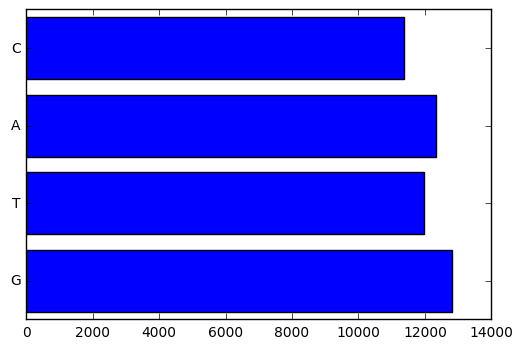

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

counts = Counter(data).items()
pos = np.arange(4)+.5
plt.barh(pos, [c for _, c in counts], align="center")
plt.yticks(pos, [n for n, _ in counts]);

In [6]:
[c for _, c in counts]

[12820, 11986, 12334, 11362]

Let us try with another species, this time, with bacteria. [Mycobacterium tuberculosis](https://en.wikipedia.org/wiki/Mycobacterium_tuberculosis) is a pathogenic bacteria, that is, bacteria that can cause a disease. Mycobacterium tuberculosis infects lungs. To find the ID, that is, the locus information we need for fetching the genome, we again go to GenBank and search with the name of the bacteria. We actually find that there are two strains of bacteria that have been sequenced and stored in GenBank. One is [H37Rv](https://www.ncbi.nlm.nih.gov/nuccore/AL123456.3), and the other one [H37RvSiena](https://www.ncbi.nlm.nih.gov/nuccore/CP007027.1). We take the first one.

In [7]:
with Entrez.efetch(db="nucleotide", id="AL123456.3", rettype="gb") as handle:
    data = SeqIO.read(handle, "genbank")
len(data)

4411532

This genome is way bigger than that of the virus, and takes a while to load. If we would get serious on this (and would not sketch the code in iPython), we would download the genome and save it locally in the standard [FASTA](https://en.wikipedia.org/wiki/FASTA_format) format to work with it locally:

In [8]:
with open("data/m_tuberculosis.fasta", "w") as f:
    SeqIO.write([data], f, "fasta")

Fine, we can work with this sequence locally. It takes only a second to load. Let us do some nucleotide frequence analysis as well:

In [9]:
data = SeqIO.read("data/m_tuberculosis.fasta", "fasta")
Counter(data)

Counter({'A': 758552, 'C': 1449998, 'G': 1444614, 'T': 758368})

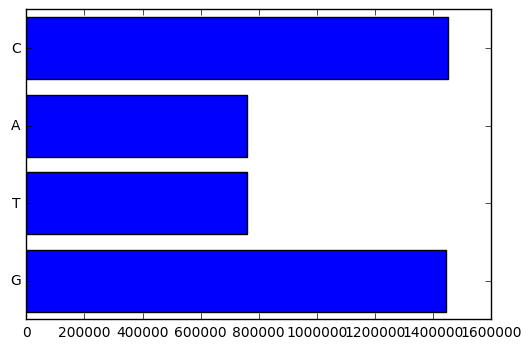

In [10]:
counts = Counter(data).items()
pos = np.arange(4)+.5
plt.barh(pos, [c for _, c in counts], align="center")
plt.yticks(pos, [n for n, _ in counts]);

The differences in counts are now quite substantial. It is also interesting that the counts of A and T almost match, and so do the counts for G and C. 

## Time for some Formalism

To describe DNA sequence we will use lists of symbols from an alphabet $\mathcal{N}=\{{\rm A},{\rm C},{\rm T},{\rm G}\}$. We will represent sequences with vectors and denote them with symbols like $\vec{x}$, $\vec{s}$ and $\vec{t}$. Most often, we will be lazy and simply omit the arrow, and use symbols like $x$, $s$ and $t$ for sequences.

Consider now a DNA sequence $x$. This is a finite string from an alphabet $\mathcal{N}$, such that $x=x_1 x_2 x_3 \ldots x_n$, where $x_i$ is an element of a string such that $x_i\in\mathcal{N}$.

## Multinomial Model of a Sequence

The simplest (and the least useful) model of a sequence is a multinomial model. This model simply contains the probabilities with which each of the nucleotides appears in the sequence. The model assumes that nucleotides are independently and identically distributed. In statistics this assumption is abbreviated as [i.i.d.](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables). Independently here means that the probability of encountering a symbol in a sequence does not depend on the sequence position or any of the neighbors in the sequence. Intuition can tell us that this should not be the case in the DNA, but yet multinomial model can still provide us a base to reason about the sequence and especially to reason how the sequences violate the i.i.d. property.

The multinomial model of a DNA sequence will be defined as $\vec{p}=(p_{\rm A},p_{\rm C},p_{\rm T},p_{\rm G})$, where $p_z=p(x_i=z)$ and $\sum_{z\in\{\rm A,C,T,G\}}p_z=1$.

The multinomial model of a DNA sequence will be defined as $\vec{p}=(p_{\rm A},p_{\rm C},p_{\rm T},p_{\rm G})$, where $p_z=p(x_i=z)$ and 

$$\sum_{z\in\{A,C,T,G\}}p_z=1$$

Considering a multinomial model, the probability of a sequence is

$$P(x)=\prod_{i=1}^n p(x_i)$$ 

Do you this probability will be large or small, or perhaps very very small? Why?

## Estimation of Parameters of Multinomial Model

That's actually very simple. We will estimate the probabilities that define multinomial model through relative frequencies:

$$p_z={N_z\over n}$$

where $z\in\mathcal{N}$. Turns out that most often we will observe that $p_{\rm A}\approx p_{\rm T}$ and $p_{\rm C}\approx p_{\rm G}$.

Let us construct a multinomial model for the DNA sequence of Mycobacterium tuberculosis, that is, for the last sequence we have read in the Python code above.

In [11]:
c = Counter(data)

In [12]:
ps = {z: count/len(data) for z, count in c.items()}
print("\n".join("%s: %5.3f" % (z, p) for z, p in ps.items()))

G: 0.327
T: 0.172
A: 0.172
C: 0.329


## Finding Unusual DNA Words

More then probabilities of individual nucleotides we could be interested in probabilities of short subsequences of length $k$. Here, we will consider only dinucleotides, that is subsequences of lenght $k=2$. Say, we would like to observe if a subsequence CG appears more often then it would be expected by chance. By chance, using our multinomial model, the probability that for some random nucleotide we would get a combination of C and G (that is, a subsequence CG) is equal to $p_C\times p_G$. That was easy. So what is then the probability of CG which we can estimate from the actual genome. We observe all the dinucleotides (there are $n-1$ of them) and count how many of them are equal to CG. That is, we estimate this probability as $N_{\rm CG}/(n-1)$. We can now report on odds ratio, that is the ration between observed probability and expected probability of the dinucleotide, where expected probability is coming from multinomial model that was constructed under assumption of i.i.d. That is, under assumption that there is no order in the genome. Often, instead of odds ratio, we would report on log odds ratio, as this is a symmetrical measure of surprise centered at 0.

Time to implement this in code. 

In [13]:
def tuple_walk(s, k=2):
    """Generate subsequences of length k."""
    for i in range(len(s)-1):
        yield s[i:i+k]

First, let's check if tuple walk actually works.

In [14]:
list(tuple_walk("ACCTAGGCT"))

['AC', 'CC', 'CT', 'TA', 'AG', 'GG', 'GC', 'CT']

Great! Now we first need to get the multinomial model, and then we will estimate the probabilities for all the dinucleotides.

In [15]:
probs = {z: c/len(data) for z, c in Counter(data.seq).items()}
probs

{'A': 0.17194752299201274,
 'C': 0.32868355029499957,
 'G': 0.32746311258764527,
 'T': 0.1719058141253424}

In [16]:
prob_pairs = {z: c/(len(data)-1) for z, c in Counter(tuple_walk(str(data.seq))).items()}
prob_pairs

{'AA': 0.031178064939360053,
 'AC': 0.05886709171940535,
 'AG': 0.04490209861383724,
 'AT': 0.037000306696246724,
 'CA': 0.06270702846698799,
 'CC': 0.09406326284457708,
 'CG': 0.12734921277896494,
 'CT': 0.044564120710021075,
 'GA': 0.06115133272326546,
 'GC': 0.11488347242714604,
 'GG': 0.09234254502575183,
 'GT': 0.05908560996171171,
 'TA': 0.01691113583923586,
 'TC': 0.06086979780942262,
 'TG': 0.06286933039799561,
 'TT': 0.0312555890460704}

Now, let us compute the odds ratio for CG:

In [17]:
odds = prob_pairs["CG"] / (probs["C"] * probs["G"])
odds

1.1831938666933133

Looks like CG dinucleotide appears more frequently than expected. Yet, 1.18 is quite close to 1.0. What would be the probability that we could get such a result by chance? Would you know how to apply your knowledge of statistics to answer this question?

## Some Biological Backround

There is actually a good reason why we could be interested in CG dinucleotides. In fact, we interested in areas, or islands of DNA sequences where CG dinuclotides (popularly referred to as CpG) appear in abundance. Namely, mostly in higher-level organisms the part of the DNA around CpG gets methylated. 

![](figs/02-methylation.png "Methylation.")

[DNA Methylation](https://en.wikipedia.org/wiki/DNA_methylation) can prevent DNA to be transcribed. Wikipedia states that the rate of cytosine CpG DNA methylation differs strongly between species: 14% of cytosines are methylated in Arabidopsis thaliana, 4% in Mus musculus, 2.3% in Escherichia coli, 0.03% in Drosophila, and virtually none (< 0.0002%) in yeast. For mammals, this rate could be even higher, as between 60% and 90% of all CpGs are methylated! Methylation is a way of regulation of gene expression, where gene expression refers to the degree an information encoded by a gene (ok, we have yet to define this term, next lesson will be on this) is used in synthesis of corresponding protein. Methylation has been recently extensively studied within a field called [epigenetics](https://en.wikipedia.org/wiki/Epigenetics).

![](figs/02-epigenetics.png "Mechanisms of epigenetics.")